# Data Analysis 2025

## Chapter V: Classification and Logistic Regression

### Learning Goals

- Formulate classification problems using appropriate loss functions
- Recognize (and design) the logistic regression as a linear model 
- Develop & experiment with classifiers (logistic regression, k-NN and more advanced models to come)
- Assess (and compare) a classifier performance (with different metrics: accuracy, precision, recall, TPR, FPR, AUC)

# Announcements

- Clinic 1 is due tomorrow. Wildcards can be used (per group). Don't tell me, don't ask me anything, just submit when you are ready and count your wildcards. Small delays (e.g. submitting at 00.30 do not count as extra days). Canvas will still show the submission as late but don't worry!

# Part 1: Classification

So far we looked at regression problems. Let's now define classification

# Review: Components of a Supervised Machine Learning Problem

To apply supervised learning, we define a dataset and a learning algorithm.

$$ \underbrace{\text{Dataset}}_\text{Features, Attributes, Targets} + \underbrace{\text{Learning Algorithm}}_\text{Model Class + Objective + Optimizer } \to \text{Predictive Model} $$

The output is a predictive model that maps inputs to targets. For instance, it can predict targets on new inputs.

# Review: Regression vs. Classification

Consider a training dataset $\mathcal{D} = \{(x^{(1)}, y^{(1)}), (x^{(2)}, y^{(2)}), \ldots, (x^{(n)}, y^{(n)})\}$.

We distinguish between supervised learning problems depending on the targets $y^{(i)}$:

1. __Regression__: The target space is continuous: $\mathcal{Y} \subseteq \mathbb{R}$.
2. __Classification__: The target space is discrete: $\mathcal{Y} = \{y_1, y_2, \ldots y_K\}$. <br>
   Each of the $K$ discrete values corresponds to a *class* that we want to predict</span>

# Binary Classification

An important special case of classification is when the number of classes $K=2$.

In this case, we have an instance of a *binary classification* problem.

# An Example: Classifying Iris Flowers

Our running example for classification problems will be the __iris flower dataset__. 

This is a classical dataset originally published by [R. A. Fisher](https://en.wikipedia.org/wiki/Ronald_Fisher)

Let's import the dataset from `sklearn`.

In [1]:
import warnings; warnings.filterwarnings('ignore')
from sklearn import datasets
iris = datasets.load_iris(as_frame=True)
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

Below, we print out some random rows of this dataset.

In [2]:
import pandas as pd
iris_X, iris_y = iris.data, iris.target
pd.concat([iris_X, iris_y], axis=1).sample(15) # sample 15 random rows from the data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
20,5.4,3.4,1.7,0.2,0
85,6.0,3.4,4.5,1.6,1
47,4.6,3.2,1.4,0.2,0
28,5.2,3.4,1.4,0.2,0
117,7.7,3.8,6.7,2.2,2
107,7.3,2.9,6.3,1.8,2
70,5.9,3.2,4.8,1.8,1
71,6.1,2.8,4.0,1.3,1
19,5.1,3.8,1.5,0.3,0
119,6.0,2.2,5.0,1.5,2


# Understanding Classification

How is classification different from regression?
* **Regression**: fit a curve that passes close to the targets $y^{(i)}$.
* **Classification**: find boundaries separating the classes in the feature space
* Classification model outputs often have a simple **probabilistic interpretation**: <br>
 they are probabilities that a data point belongs to a given class

Let's look at an example on the Iris dataset. We visualize this dataset using the first 2 attributes using `matplotlib`.

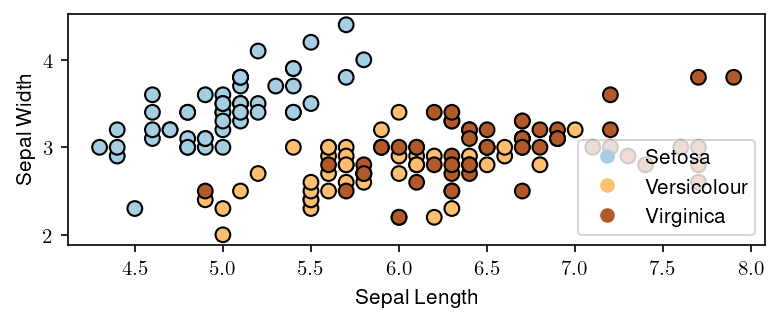

In [3]:
import matplotlib.pyplot as plt 
#Code from: https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html
plt.rcParams.update({ "figure.figsize": [6, 2], "figure.dpi": 150, "text.usetex": True, "font.family": "Helvetica"})
p1 = plt.scatter(iris_X.iloc[:, 0], iris_X.iloc[:, 1], c=iris_y, edgecolor='k', s=50, cmap=plt.cm.Paired)
plt.xlabel('Sepal Length'); plt.ylabel('Sepal Width')
plt.legend(handles=p1.legend_elements()[0], labels=['Setosa', 'Versicolour', 'Virginica'], loc='lower right');

Let's train a classification algorithm called __logistic regression__.

In [4]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(C=1e5) #large C means that there is no regularization (more soon)
X, Y = iris_X.to_numpy()[:,:2], iris_y.copy()
logreg.fit(X, Y);

The regions below are predicted to be associated with the blue, brown, and yellow classes. The lines between them are the decision boundaries.

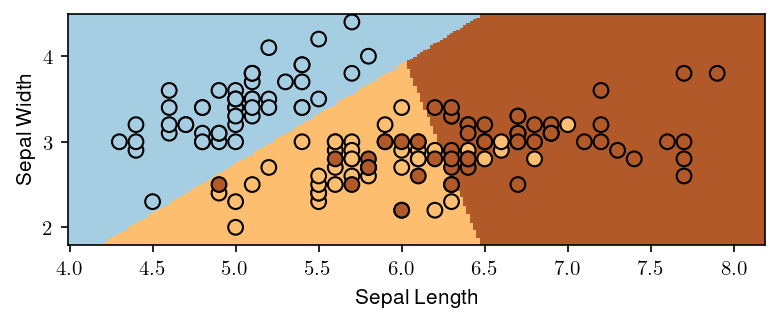

In [5]:
import numpy as np
xx, yy = np.meshgrid(np.arange(4, 8.2, .02), np.arange(1.8, 4.5, .02))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
plt.pcolormesh(xx, yy, Z.reshape(xx.shape), cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired, s=50)
plt.xlabel('Sepal Length'); plt.ylabel('Sepal Width');

# Part 2: Logistic Regression

We are now going to dive a bit deeper in logistic regression.

## Binary Classification 

+ We will to start by looking at __binary__ (two-class) classification. 
+ To keep things simple, we will use the Iris dataset.

We will attempt to distinguish class 0 *(Iris Setosa)* from the other two classes, using only the first two features in the dataset

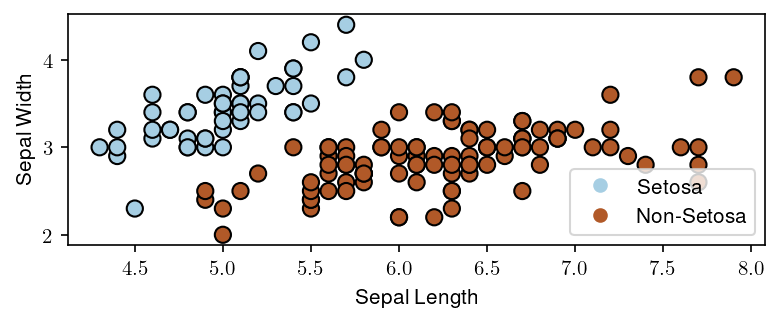

In [6]:
iris_y2 = iris_y.copy()
iris_y2[iris_y2==2] = 1  # rename class two to class one

# plot also the training points
p1 = plt.scatter(iris_X.iloc[:, 0], iris_X.iloc[:, 1], c=iris_y2, edgecolor='k', s=60, cmap=plt.cm.Paired)
plt.xlabel('Sepal Length'); plt.ylabel('Sepal Width')
plt.legend(handles=p1.legend_elements()[0], labels=['Setosa', 'Non-Setosa'], loc='lower right');

## POLL:

<img src="wooclap.png" alt="drawing" width="500"/>

### Can (Should?) I use linear regression to separate the two classes?

### A. Yes
### B. No

# Review: Ordinary Least Squares

Recall that in ordinary least squares, we fit a linear model of the form
$$ f(x) = \sum_{j=0}^d \theta_j \cdot x_j = \theta^\top x. $$

It minimizes the mean squared error (MSE)
$$J(\theta)= \frac{1}{2n} \sum_{i=1}^n(y^{(i)}-\theta^\top x^{(i)})^2$$
on a dataset $\{(x^{(1)}, y^{(1)}), (x^{(2)}, y^{(2)}), \ldots, (x^{(n)}, y^{(n)})\}$.

We could use least squares to solve our classification problem, setting $\mathcal{Y} = \{0, 1\}$.

In [7]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
X, Y = iris_X.to_numpy()[:,:2], iris_y2
linreg.fit(X, Y);

In [8]:
#print the parameters
print(linreg.intercept_)
print(linreg.coef_)

0.22471330249455612
[ 0.3744393  -0.57109254]


The model we fit is actually this one:

$$y = \theta_0 + \theta_1 \times \text{sepal_length} + \theta_2 \times \text{sepal_width}$$

or

$$y = 0.2247 + 0.3744 \times \text{sepal_length} -0.5711 \times \text{sepal_width}$$

Ordinary least squares returns a decision boundary that is not unreasonable.

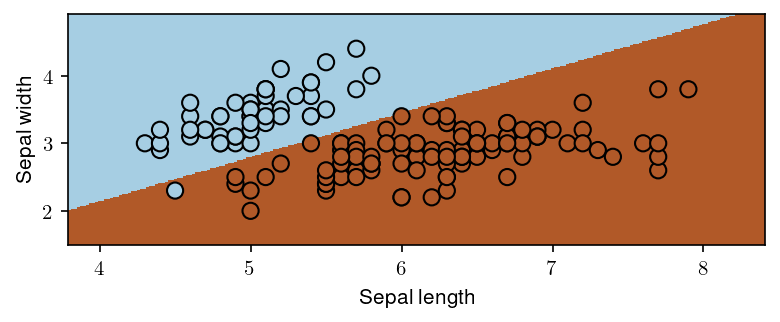

In [9]:
# Plot the decision boundary by assigning a color to each point in the mesh
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = linreg.predict(np.c_[xx.ravel(), yy.ravel()])
Z[Z>0.5] = 1.; Z[Z<0.5] = 0.

plt.pcolormesh(xx, yy, Z.reshape(xx.shape), cmap=plt.cm.Paired)
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired, s=60)
plt.xlabel('Sepal length'); plt.ylabel('Sepal width');

However, applying OLS is problematic for a few reasons.
* __Unbounded outputs__: There is nothing to prevent outputs larger than one or smaller than zero, which is conceptually wrong
* __Performance issues:__ At least one point is misclassified, and others are too close to the decision boundary.

# Logistic Regression: The Model

Logistic regression is a classification algorithm where $f_\theta$ has the form
$$ f_\theta(x) = \sigma(\theta^\top x) = \frac{1}{1 + \exp(-\theta^\top x)}. $$

This is a composition of a linear model $\theta^\top x$ with 
$$ \sigma(z) = \frac{1}{1 + \exp(-z)},$$
which is the *sigmoid* or *logistic* function.

# The Logistic Function

To address the fact that the output of linear regression is not in $[0,1]$, we will *squeeze* it into that range using
$$ \sigma(z) = \frac{1}{1 + \exp(-z)}. $$
This is known as the *sigmoid* or *logistic* function.

The logistic function $\sigma : \mathbb{R} \to [0,1]$ "squeezes" points from the real line into $[0,1]$.

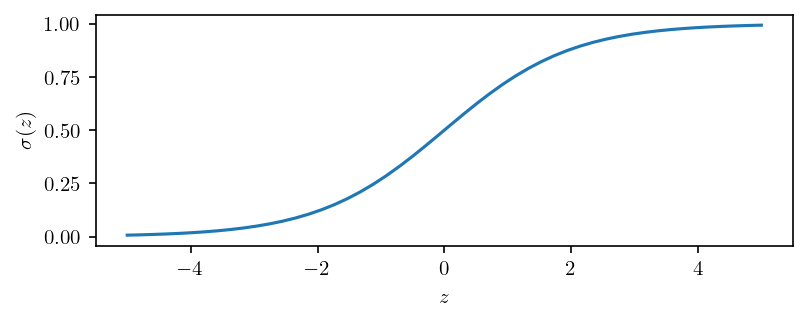

In [10]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

z = np.linspace(-5, 5)
plt.plot(z, sigmoid(z))
plt.xlabel('$z$'); plt.ylabel(r'$\sigma(z)$');

# The Logistic Function: Properties

The sigmoid function is defined as
$$ \sigma(z) = \frac{1}{1 + \exp(-z)}. $$
A few observations:

* The function tends to 1 as $z \to \infty$ and tends to 0 as $z \to -\infty$.
* Thus, models of the form $\sigma(\theta^\top x)$ output values between 0 and 1, which is suitable for binary classification.
* It is easy to show that the derivative of $\sigma(z)$ has a simple form:
$\frac{d\sigma}{dz} = \sigma(z)(1-\sigma(z)).$

# Probabilistic Interpretations

The logistic model can be interpreted to output a probability, and defines a conditional probability distribution as follows:

\begin{align*}
P_\theta(y=1 | x) & = \sigma(\theta^\top x) \\
P_\theta(y=0 | x) & = 1-\sigma(\theta^\top x).
\end{align*}

Recall that a probability over $y\in \{0,1\}$ is called Bernoulli.

# Part 3: Maximum Likelihood

In order to train a logistic regression model, we need to define an objective.

We derive this objective using the principle of maximum likelihood.

# Recall: Supervised Learning Models

A model is a function $f_\theta$ that maps inputs $x \in \mathcal{X}$ to targets $y \in \mathcal{Y}$.

\begin{align*}
\\
\textbf{Model Type} & & \textbf{How To Use} & & \textbf{Example} \\
f_\theta : \underbrace{\mathcal{X}}_\text{input} \to \underbrace{\mathcal{Y}}_\text{output} & & y_\text{pred} = f_\theta(x) & & y_\text{pred} = \theta^\top x \\
\\
\end{align*}


# Probabilistic Supervised Learning Models

A probabilistic model parameterizes a *probability* over $y_\text{pred}$ given $x$.

$$P_\theta(y= y_\text{pred} | x)$$

Given $x \in \mathcal{X}$, the model outputs a *conditional probability* $P(y|x)$
over targets $y \in \mathcal{Y}$.


For example, our logistic regression model $f_\theta$ defines ("parameterizes") a probability distribution $P_\theta(y|x)$ as follows:

\begin{align*}
P_\theta(y=1 | x) & = \sigma(\theta^\top x) \\
P_\theta(y=0 | x) & = 1-\sigma(\theta^\top x).
\end{align*}

For each $x$, $P_\theta(y|x)$ is a valid probability over $y \in \{0,1\}$.

# Why Probabilistic Models?

There are two reasons why we will be interested in probabilistic models.

* __Confidence Estimation__: Oftentimes, we want to know if the model is certain in its prediction.
* __Learning Objective__: Probabilistic models can be used to define a principled learning objective.

# Conditional Maximum Likelihood

We can train any model that defines a probability distribution $P_\theta(y|x)$ by optimizing
the *conditional maximum likelihood* objective

$$
\max_\theta \ell(\theta) = \max_{\theta} \prod_{i=1}^n P_\theta(y^{(i)} | {x}^{(i)})
$$ which can be simplified to the *conditional maximum log-likelihood*:

$$
\max_\theta \ell(\theta) = \max_{\theta} \sum_{i=1}^n \log P_\theta(y^{(i)} | {x}^{(i)}).
$$
defined over a dataset $\mathcal{D} = \{(x^{(1)}, y^{(1)}), (x^{(2)}, y^{(2)}), \ldots, (x^{(n)}, y^{(n)})\}$.

We want to choose the weights such that the true label $y^{(i)}$ has the highest possible probability under $P_\theta(y|x^{(i)})$ for each $x^{(i)}$.

Recall our earlier example with logistic regression.

\begin{align*}
P_\theta(y=1 | x)  = \sigma(\theta^\top x) &&
P_\theta(y=0 | x)  = 1-\sigma(\theta^\top x).
\end{align*}

Maximizing log-likelihood asks the model $f_\theta(x) = \sigma(\theta^\top x)$: 
* To output values close to one when the true label is one 
* And close to zero when the true label is zero

# Part 4: Learning in Logistic Regression

We will use maximum likelihood to learn the parameters of a logistic regression model.

# Logistic Regression

Recall that a logistic model defines ("parameterizes") a probability distribution $P_\theta(y|x) : \mathcal{X} \times \mathcal{Y} \to [0,1]$ as follows:

\begin{align*}
P_\theta(y=1 | x) & = \sigma(\theta^\top x) \\
P_\theta(y=0 | x) & = 1-\sigma(\theta^\top x).
\end{align*}

When $y \in \{0,1\}$, can write this more compactly as
\begin{align*}
P_\theta(y | x) = \sigma(\theta^\top x)^y \cdot (1-\sigma(\theta^\top x))^{1-y}
\end{align*}

Let's implement a logistic regression model in `numpy`.

In [11]:
def f(X, theta): 
    """The sigmoid model we are trying to fit.
    
    Parameters:
    theta (np.array): d-dimensional vector of parameters
    X (np.array): (n,d)-dimensional data matrix
    
    Returns:
    y_pred (np.array): n-dimensional vector of predicted targets
    """
    return sigmoid(X.dot(theta))

# Applying Maximum Likelihood

Following the principle of maximum likelihood, we want to optimize the following objective defined over a binary classification dataset  $\mathcal{D} = \{(x^{(1)}, y^{(1)}), (x^{(2)}, y^{(2)}), \ldots, (x^{(n)}, y^{(n)})\}$. Notice that we also divide by the number of data points $n$ to average over the whole dataset.

\begin{align*}
\ell(\theta) & = \frac{1}{n}\sum_{i=1}^n \log P_\theta (y^{(i)} \mid x^{(i)}) \\
& = \frac{1}{n}\sum_{i=1}^n \log \sigma(\theta^\top x^{(i)})^{y^{(i)}} \cdot (1-\sigma(\theta^\top x^{(i)}))^{1-y^{(i)}} \\
& = \frac{1}{n}\sum_{i=1}^n {y^{(i)}} \cdot \log \sigma(\theta^\top x^{(i)}) + (1-y^{(i)}) \cdot \log (1-\sigma(\theta^\top x^{(i)})).
\end{align*}

This objective is also often called the log-loss, or cross-entropy.

Observe that this objective asks the model to:
* Output a large score $\sigma(\theta^\top x^{(i)})$ (a score close to one) if $y^{(i)}=1$
* Output a score that's small (close to zero) if $y^{(i)}=0$.

\begin{align*}
\ell(\theta)
& = \frac{1}{n}\sum_{i=1}^n {y^{(i)}} \cdot \log \sigma(\theta^\top x^{(i)}) + (1-y^{(i)}) \cdot \log (1-\sigma(\theta^\top x^{(i)})).
\end{align*}

Let's implement the log-likelihood objective.

In [12]:
def log_likelihood(theta, X, y):
    """The cost function, J(theta0, theta1) describing the goodness of fit.
    
    We added the 1e-6 term in order to avoid overflow (inf and -inf).
    
    Parameters:
    theta (np.array): d-dimensional vector of parameters
    X (np.array): (n,d)-dimensional design matrix
    y (np.array): n-dimensional vector of targets
    """
    return (y*np.log(f(X, theta) + 1e-6) + (1-y)*np.log(1-f(X, theta) + 1e-6)).mean()

# Review: Gradient Descent
If we want to minimize an objective $J(\theta)$, we may start with an initial guess $\theta_0$ for the parameters and repeat the following update:

$$ \theta_i := \theta_{i-1} - \alpha \cdot \nabla_\theta J(\theta_{i-1}). $$

# Gradient of the Log-Likelihood

We want to use gradient descent to maximize the log-likelihood.<br>
Hence our objective is $J(\theta) = - \ell(\theta)$

The gradient of the negative log-likelihood is
\begin{align*}
\nabla_\theta J (\theta) =  \nabla_\theta \left[-\ell (\theta) \right]= 
\frac{1}{n} \sum_{i=1}^n \left( \sigma(\theta^\top x^{(i)}) - y^{(i)} \right) \cdot x^{(i)}
\end{align*}

Interestingly, this expression looks similar to the gradient of the
mean squared error, which we derived in the previous lecture.

Let's implement the gradient.

In [13]:
def loglik_gradient(theta, X, y):
    """The cost function, J(theta0, theta1) describing the goodness of fit.
    
    Parameters:
    theta (np.array): d-dimensional vector of parameters
    X (np.array): (n,d)-dimensional design matrix
    y (np.array): n-dimensional vector of targets
    
    Returns:
    grad (np.array): d-dimensional gradient of the MSE
    """
    return np.mean((f(X, theta)-y) * X.T, axis=1)

Let's now implement gradient descent.

In [14]:
threshold = 5e-5
step_size = 1e-1

theta, theta_prev = np.zeros((3,)), np.ones((3,))
opt_pts = [theta]
opt_grads = []
iter = 0
iris_X['one'] = 1
X_train = iris_X.iloc[:,[0,1,-1]].to_numpy()
y_train = iris_y2.to_numpy()

while np.linalg.norm(theta - theta_prev) > threshold:
    if iter % 50000 == 0:
        print('Iteration %d. Negative Log-likelihood: %.6f' % (iter, -log_likelihood(theta, X_train, y_train)))
    theta_prev = theta
    gradient = loglik_gradient(theta, X_train, y_train)
    theta = theta_prev - step_size * gradient
    opt_pts += [theta]
    opt_grads += [gradient]
    iter += 1

Iteration 0. Negative Log-likelihood: 0.693145
Iteration 50000. Negative Log-likelihood: 0.021506
Iteration 100000. Negative Log-likelihood: 0.015329
Iteration 150000. Negative Log-likelihood: 0.012062
Iteration 200000. Negative Log-likelihood: 0.010076


In [15]:
print(theta)

[ 11.65976942 -12.81530848 -23.12053766]


The model I fit is this:

$$
P_\theta(y=1 | x) = \sigma(\theta^\top x) =$$
$$=\sigma(11.66 -12.82 \times \text{sepal_length} -23.12 \times \text{sepal_width})
$$

Let's now visualize the result.

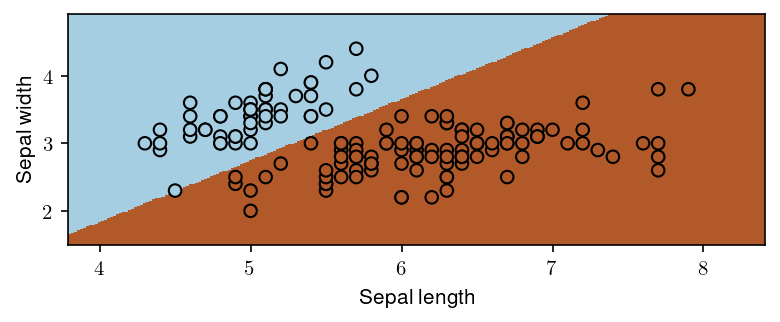

In [16]:
xx, yy = np.meshgrid(np.arange(x_min, x_max, .02), np.arange(y_min, y_max, .02))

# predict using the learned model
Z = f(np.c_[xx.ravel(), yy.ravel(), np.ones(xx.ravel().shape)], theta)
Z[Z<0.5] = 0; Z[Z>=0.5] = 1

plt.pcolormesh(xx, yy, Z.reshape(xx.shape), cmap=plt.cm.Paired)

plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length'); plt.ylabel('Sepal width');

This is how we would use the algorithm via `sklearn`

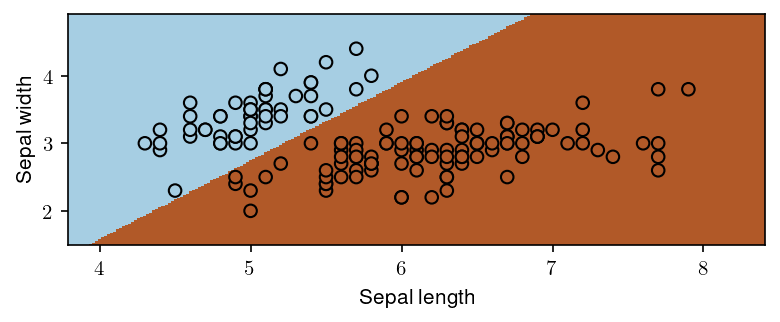

In [17]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1e5, fit_intercept=True)

# Create an instance of Logistic Regression Classifier and fit the data.
X = iris_X.to_numpy()[:,:2]
Y = iris_y2
logreg.fit(X, Y)

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, .02))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])

plt.pcolormesh(xx, yy, Z.reshape(xx.shape), cmap=plt.cm.Paired)

plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length'); plt.ylabel('Sepal width');

# Observations About Logistic Regression

Logistic regression finds a linear decision boundary.

This is the set of points for which $P(y=1|x)=P(y=0|x)$. 

Equivalently:
\begin{align*}
0 = \log\frac{P(y=1|x)}{P(y=0|x)}
= \log \frac{\frac{1}{1+\exp(-\theta^\top x)}}{1-\frac{1}{1+\exp(-\theta^\top x)}}
= \theta^\top x
\end{align*}
The set of $x$ for which $0=\theta^\top x$ is a linear surface. More on this on the last part of the notebook and during clinic 2.

Unlike least squares, we don't have a closed form solution (a formula) for the optimal $\theta$. 

We can nonetheless find it numerically via gradient descent.

# Algorithm: Logistic Regression

* __Type__: Supervised learning (binary classification)
* __Model family__: Linear decision boundaries.
* __Objective function__: Cross-entropy, a special case of log-likelihood.
* __Optimizer__: Gradient descent.
* __Probabilistic interpretation__: Parametrized Bernoulli distribution.

# Part 5: Multi-Class Classification

Let's look at an extension of logistic regression to an arbitrary number of classes.

# Multi-Class Classification

Logistic regression only applies to binary classification problems. <br>
What if we have an arbitrary number of classes $K$?

* The simplest approach is the **"one vs. all" approach**: <br>
  Train one classifier for each class to distinguish that class from all the others.
* This works, but is not very elegant. 
* Alternatively, we may fit a probabilistic model that outputs multi-class probabilities.

Let's load a fully multiclass version of the Iris dataset.

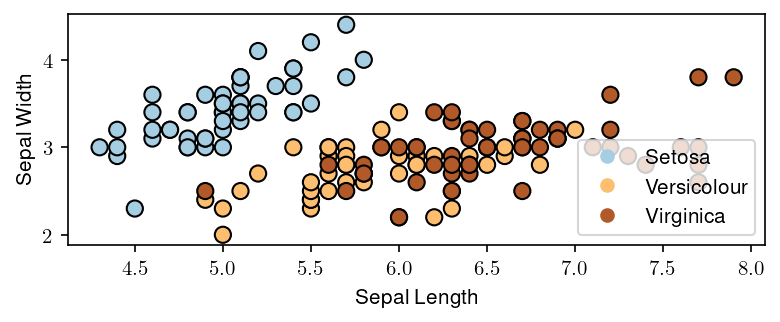

In [18]:
# https://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html
p1 = plt.scatter(iris_X.iloc[:, 0], iris_X.iloc[:, 1], c=iris_y,
            edgecolor='k', s=60, cmap=plt.cm.Paired)
plt.xlabel('Sepal Length'); plt.ylabel('Sepal Width')
plt.legend(handles=p1.legend_elements()[0], labels=['Setosa', 'Versicolour', 'Virginica'], loc='lower right');

# The Softmax Function

The logistic function $\sigma : \mathbb{R} \to [0,1]$ "squeezes" the score $z\in\mathbb{R}$ of a class into a probability in $[0,1]$.

The *softmax* function $\vec \sigma : \mathbb{R}^K \to [0,1]^K$ is a multi-class version of $\sigma$ 
* It takes in a $K$-dimensional *vector* of class scores $\vec z\in\mathbb{R}$ 
* It "squeezes" $\vec z$ into a length $K$ *vector* of  probabilities in $[0,1]^K$

The $k$-th component of the output of the softmax function $\vec \sigma$ is defined as
$$ \sigma(\vec z)_k = \frac{\exp(z_k)}{\sum_{l=1}^K \exp(z_l)}. $$

Softmax takes a vector of scores $\vec z$, exponentiates each score $z_k$, and normalizes the exponentiated scores such that they sum to one.

When $K=2$, this looks as follows:
$$ \sigma(\vec z)_1 = \frac{\exp(z_1)}{\exp(z_1) + \exp(z_2)}. $$

Observe that adding a constant $c \in \mathbb{R}$ to each score $z_k$ doesn't change the output of softmax, e.g.:
$$ \frac{\exp(z_1)}{\exp(z_1) + \exp(z_2)} = \frac{\exp(z_1+c)}{\exp(z_1+c) + \exp(z_2+c)}. $$

Without loss of generality, we can assume $z_1=0$. For any $\vec z = (z_1, z_2)$, we can define $\vec z' = (0, z_2') = (0, z_2-z_1)$ such that $\vec\sigma(\vec z) = \vec\sigma(\vec z')$. Assuming $z_1=0$ doesn't change the probabilities that $\vec\sigma$ can output.

Assuming that $z_1 =0$ means that $\exp(z_1) = 1$ and softmax becomes
$$ \sigma(\vec z)_1 = \frac{1}{1 + \exp(z_2)}. $$
This is effectively our sigmoid function. Hence softmax generalizes the sigmoid function.

# Recall: Logistic Regression

Logistic regression is a classification algorithm which uses a model $f_\theta$ of the form
$$ f_\theta(x) = \sigma(\theta^\top x) = \frac{1}{1 + \exp(-\theta^\top x)}, $$
where 
$$ \sigma(z) = \frac{1}{1 + \exp(-z)} $$
is the *sigmoid* or *logistic* function. It trains this model using maximum likelihood.

# Softmax Regression: Model Class

Softmax regression is a multi-class classification algorithm which uses a model $f_\theta : \mathcal{X} \to [0,1]^K$ that generalizes logistic regression.

Softmax regression works as follows:
1. Given an input $x$, we compute $K$ scores, one per class. The score 
$$z_k = \theta_k^\top x$$
of class $k$ is a linear function of $x$ and parameters $\theta_k$ for class $k$

2. We "squeeze" the vector of scores $\vec z$ into $[0,1]^K$ using the softmax function $\vec\sigma$ and we output $\vec\sigma(\vec z)$, a vector of $K$ probabilities.

The parameters of this model are $\theta = (\theta_1, \theta_2, ..., \theta_K)$, and the parameter space is $\Theta = \mathbb{R}^{K \times d}$.

The output of the model is a *vector* of class membership probabilities, whose $k$-th component $f_\theta(x)_k$ is
$$ f_\theta(x)_k = \sigma(\theta_k^\top x)_k = \frac{\exp(\theta_k^\top x)}{\sum_{l=1}^K \exp(\theta_l^\top x)}, $$
where each $\theta_l \in \mathbb{R}^d$  is the vector of parameters for class $\ell$ and $\theta = (\theta_1, \theta_2, ..., \theta_K)$.

You may have noticed that this model is slightly over-parametrized. in practice, it is often assumed that one of the class weights $\theta_l=0$

# Softmax Regression: Probabilistic Interpretation

The softmax model outputs a vector of probabilities, and defines a conditional probability distribution as follows:

\begin{align*}
P_\theta(y=k | x) & = \vec\sigma(\vec z)_k =\frac{\exp(\theta_k^\top x)}{\sum_{l=1}^K \exp(\theta_l^\top x)}.
\end{align*}

Recall that a probability over $y\in \{1,2,...,K\}$ is called Categorical.

# Softmax Regression: Learning Objective

We again maximize likelihood over a dataset  $\mathcal{D}$.
\begin{align*}
L(\theta) & = \prod_{i=1}^n P_\theta (y^{(i)} \mid x^{(i)}) = \prod_{i=1}^n \vec \sigma(\vec z^{(i)})_{y^{(i)}} \\
& = \prod_{i=1}^n \left( \frac{\exp(\theta_{y^{(i)}}^\top x^{(i)})}{\sum_{l=1}^K \exp(\theta_l^\top x^{(i)})} \right). \\
\end{align*}

We then try to minimize the negative log-likelihood by gradient descent.

Let's now apply softmax regression to the Iris dataset by using the implementation from `sklearn`.

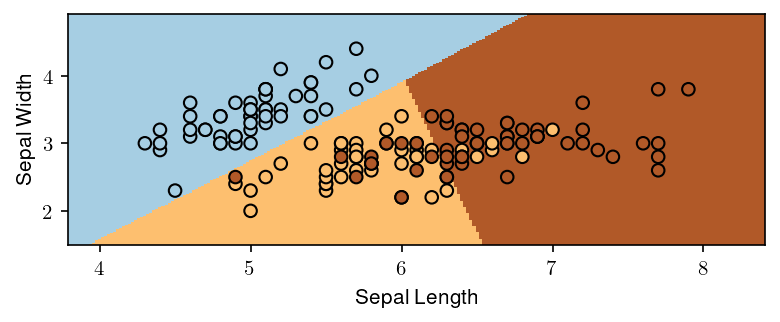

In [19]:
# https://scikit-learn.org/stable/auto_examples/linear_model/plot_iris_logistic.html
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1e5, multi_class='multinomial')

logreg.fit(X, iris_y) # Create an instance of Softmax and fit the data.
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])

plt.pcolormesh(xx, yy, Z.reshape(xx.shape), cmap=plt.cm.Paired)

plt.scatter(X[:, 0], X[:, 1], c=iris_y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal Length'); plt.ylabel('Sepal Width');

# Algorithm: Softmax Regression

* __Type__: Supervised learning (multi-class classification)
* __Model family__: Linear decision boundaries.
* __Objective function__: Softmax loss, a special case of log-likelihood.
* __Optimizer__: Gradient descent.
* __Probabilistic interpretation__: Parametrized categorical distribution.

In summary, the key takeaways are:

* Do **classification** by taking a regression model and mapping the output into $[0,1]$ e.g., via sigmoid or softmax
* ML models usually have **probabilistic interpretations** as $P_\theta(y|x)$
* Any probabilistic model can be trained using **maximum likelihood**: $$\max_\theta \sum_{i=1}^n P_\theta(y^{(i)}|x^{(i)})$$

# Part 6: Logistic Regression in `sklearn` - Decision Boundaries

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import sklearn.linear_model as lm
import plotly.io as pio
import plotly.express as px
import plotly.graph_objects as go
pio.renderers.default = "iframe"
pio.templates["plotly"].layout.colorway = px.colors.qualitative.Vivid
px.defaults.width = 800

basketball = pd.read_csv("data/nba.csv")
first_team = basketball.groupby("GAME_ID").first()
second_team = basketball.groupby("GAME_ID").last()
games = first_team.merge(second_team, left_index = True, right_index = True, suffixes = ["", "_OPP"])
games['GOAL_DIFF'] = games["FG_PCT"] - games["FG_PCT_OPP"]
games['WON'] = (games['WL'] == "W").astype(int)
games = games[['TEAM_NAME', 'TEAM_NAME_OPP', 'MATCHUP', 'WON', 'WL', 'AST', 'GOAL_DIFF']]
np.random.seed(42)
games["JitterWON"] = games["WON"] + np.random.uniform(-0.1, 0.1, len(games))

games



,TEAM_NAME,TEAM_NAME_OPP,MATCHUP,WON,WL,AST,GOAL_DIFF,JitterWON
GAME_ID,,,,,,,,
21700001,Boston Celtics,Cleveland Cavaliers,BOS @ CLE,0,L,24,-0.049,-0.025092
21700002,Golden State Warriors,Houston Rockets,GSW vs. HOU,0,L,34,0.053,0.090143
21700003,Charlotte Hornets,Detroit Pistons,CHA @ DET,0,L,16,-0.030,0.046399
21700004,Indiana Pacers,Brooklyn Nets,IND vs. BKN,1,W,29,0.041,1.019732
21700005,Orlando Magic,Miami Heat,ORL vs. MIA,1,W,22,0.042,0.931204
...,...,...,...,...,...,...,...,...
21701226,New Orleans Pelicans,San Antonio Spurs,NOP vs. SAS,1,W,30,0.189,1.027705
21701227,Oklahoma City Thunder,Memphis Grizzlies,OKC vs. MEM,1,W,32,0.069,0.979519
21701228,LA Clippers,Los Angeles Lakers,LAC vs. LAL,0,L,27,0.017,-0.045157


The `LogisticRegression` class of `sklearn.linear_model` behaves very similarly to the `LinearRegression` class. As before, we:

1. Initialize a model object, and
2. Fit it to our data.

Now, rather than predicting a numeric output, we predict the *probability* of a datapoint belonging to Class 1. We do this using the `.predict_proba` method.

In [21]:
X = games[["GOAL_DIFF"]]
Y = games["WON"]

model = lm.LogisticRegression()
model.fit(X, Y)
print("Slope:", model.coef_[0][0])
print("Intercept:", model.intercept_[0])

Slope: 11.82171134472184
Intercept: -0.022895093635768988


In [22]:
# Preview the first 10 rows
model.predict_proba(X)[:10]

array([[0.64615008, 0.35384992],
       [0.35350779, 0.64649221],
       [0.5932812 , 0.4067188 ],
       [0.38656007, 0.61343993],
       [0.38376056, 0.61623944],
       [0.59042552, 0.40957448],
       [0.70312773, 0.29687227],
       [0.63252173, 0.36747827],
       [0.31156713, 0.68843287],
       [0.61588544, 0.38411456]])

By default, `.predict_proba` returns a 2D array. One column contains the predicted probability that the datapoint belongs to Class 0, and the other contains the predicted probability that it belongs to Class 1 (notice that all rows sum to a total probability of 1). To check which is which, we can use the `.classes_` attribute.

In [23]:
model.classes_

array([0, 1])

This tells us that the first column contains the probabilities of belonging to Class 0 (losing the game), and the second column contains the probabilities of belonging to Class 1 (winning). Let's grab just the probabilities of Class 1.

We then apply a decision rule: Predict Class 1 if the predicted probability of belonging to Class 1 is 0.5 or higher. Otherwise, predict Class 0.

In [24]:
# Obtain P(Y=1|x) from the output.
p = model.predict_proba(X)[:, 1]

# Apply decision rule: predict Class 1 if P(Y=1|x) >= 0.5.
(p >= 0.5).astype(int)

array([0, 1, 0, ..., 1, 0, 0])

The `.predict` method of `LogisticRegression` will automatically apply a 0.5 threshold to classify data.

In [25]:
# .predict will automatically apply a 0.5 threshold for a logistic regression model.
classes = model.predict(X)

classes

array([0, 1, 0, ..., 1, 0, 0])

The point where the sigmoid function outputs 0.5 is the decision boundary. This is the point where the model is indifferent between predicting Class 0 and Class 1.  This is also the point where $\theta_0 + \theta_1 x = 0$. For this one dimensional case we can solve for the $x$ value of the decision boundary:

$$
x = - \frac{\theta_0}{\theta_1} = - \frac{\text{intercept}}{\text{slope}}
$$

Let's visualize our predictions.

In [26]:
 -model.intercept_[0]/model.coef_[0][0]

0.0019366987543636138

In [27]:
games["Predicted Class"] = pd.Categorical(classes)

test_points = pd.DataFrame({"GOAL_DIFF": np.linspace(-0.3, 0.3, 100)})
test_points["Predicted Prob"] = model.predict_proba(test_points)[:, 1]

fig = px.scatter(games, x="GOAL_DIFF", y="JitterWON", color="Predicted Class")
# Add the logistic regression model predictions
fig.add_trace(go.Scatter(x=test_points["GOAL_DIFF"], y=test_points["Predicted Prob"], 
                         mode="lines", name="Logistic Regression Model", 
                         line_color="black", line_width=5, line_dash="dash"))
fig.add_vline(x = -model.intercept_[0]/model.coef_[0][0], line_dash="dash", 
              line_color="black",
              annotation_text="Decision Boundary", 
              annotation_position="right")


Any time the predicted probability $p$ is less than 0.5, the model predicts Class 0. Otherwise, it predicts Class 1.

A decision boundary describes the line that splits the data into classes based on the *features*.

For a model with one feature, the decision boundary is a *point* that separates the two classes. We visualize this using a 1D plot to plot all data points in terms of *just* the feature – we cannot define a decision boundary in terms of the predictions, so we remove that axis from our plot.

Notice that all data points to the right of our decision boundary are classified as Class 1, while all data points to the left are classified as Class 0.

In [28]:
fig = px.scatter(games, x="GOAL_DIFF", y=np.zeros(len(games)),
                 symbol="WL", symbol_sequence=[ "circle-open", "cross"], 
                 color="Predicted Class", height=300, opacity=0.7)
# fig.update_traces(marker_symbol='line-ns-open')
fig.update_traces(marker_size=8)
fig.update_layout(
    yaxis=dict(showticklabels=False, showgrid=False, zeroline=False, title=""),
)

decision_boundary =  -model.intercept_[0]/model.coef_[0][0]
fig.add_vline(x = decision_boundary, line_dash="dash", 
              line_color="black",
              annotation_text="Decision Boundary", 
              annotation_position="top right")

## Two Features

We can repeat this process with a model with two features: `"AST"` and `"GOAL_DIFF"`. Now, we express a decision boundary in terms of both of these two features.

How do we find the decision boundary in this case? We calculate the equation for the line that gives us all the points for which the model output is equal to the threshold:

$$T = \frac{1}{1+e^{-\theta_0 -\theta_1\times\text{GOAL\_DIFF}-\theta_2\times\text{AST}}}$$ 

$$\Longrightarrow$$

$$\theta_0 + \theta_1\times\text{GOAL\_DIFF} + \theta_2\times\text{AST} = - \log(\frac{1}{T}-1)$$


In [29]:
X_two_feature = games[["GOAL_DIFF", "AST"]]
Y = games["WON"]

two_feature_model = lm.LogisticRegression()
two_feature_model.fit(X_two_feature, Y)

# This function plots the decision boundary such that AST is a function of GOAL_DIFF.
theta0 = two_feature_model.intercept_
theta1, theta2 = two_feature_model.coef_[0]
print(theta0, theta1, theta2)


[-2.1118332] 10.785521824889479 0.09027541671741887


Make predictions using the new model:

In [30]:
games["Predicted Class"] = two_feature_model.predict(X_two_feature)
games.head()

,TEAM_NAME,TEAM_NAME_OPP,MATCHUP,WON,WL,AST,GOAL_DIFF,JitterWON,Predicted Class
GAME_ID,,,,,,,,,
21700001,Boston Celtics,Cleveland Cavaliers,BOS @ CLE,0,L,24,-0.049,-0.025092,0
21700002,Golden State Warriors,Houston Rockets,GSW vs. HOU,0,L,34,0.053,0.090143,1
21700003,Charlotte Hornets,Detroit Pistons,CHA @ DET,0,L,16,-0.030,0.046399,0
21700004,Indiana Pacers,Brooklyn Nets,IND vs. BKN,1,W,29,0.041,1.019732,1
21700005,Orlando Magic,Miami Heat,ORL vs. MIA,1,W,22,0.042,0.931204,1


In the following, we compute the decision boundary for this model:

In [31]:
# Construct the decision boundary
decision_boundary = pd.DataFrame({"GOAL_DIFF": np.linspace(-0.3, 0.3, 100)})
decision_boundary["AST"] = (theta0 + theta1*decision_boundary["GOAL_DIFF"])/(-theta2)

Plotting the new model:

In [32]:
games['Predicted Class'] = pd.Categorical(games['Predicted Class'])
fig = px.scatter(games, x="GOAL_DIFF", y="AST", symbol="WL", 
                 hover_data=['TEAM_NAME', 'TEAM_NAME_OPP'],
                 color="Predicted Class", 
                 symbol_sequence=[ "circle-open", "cross"],
                 opacity=0.7,
                 height=600)
fig.update_traces(marker=dict(size=8))
fig.update_layout(xaxis_range=[-0.3, 0.3], yaxis_range=[5, 50])
# Add the decision boundary to the plot
fig.add_scatter(x=decision_boundary["GOAL_DIFF"], y=decision_boundary["AST"],
                mode="lines", line_color="black", line_dash="dash", 
                name="Decision Boundary")

Adding the probabilities to the plot 

In [33]:
goal_diff, ast = np.meshgrid(np.linspace(-0.3, 0.3, 50), np.linspace(5, 50, 50))
pred_grid = pd.DataFrame({"GOAL_DIFF": np.ravel(goal_diff), "AST": np.ravel(ast)})
pred_grid['Probability'] = two_feature_model.predict_proba(pred_grid)[:, 1]
# fig = go.Figure()
fig.add_contour(x=pred_grid['GOAL_DIFF'], y=pred_grid['AST'], z=pred_grid['Probability'],
                showscale=False, opacity=0.4, colorscale="Matter")

## 6.1 Logistic Regression on two moons

Let's consider a synthetic dataset in the shape of "two moons". Here, each sample has two pieces of information: 
* the *features*, denoted by $x_i$, which are just a two-dimensional coordinate and 
* a *class*, denoted by $y_i$, which is either 0 and 1. 

In [34]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.datasets import make_moons, load_iris
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)

<class 'numpy.ndarray'> <class 'numpy.ndarray'>
(500, 2) (500,)
[[ 0.50316464  0.11135559  1.        ]
 [ 1.06597837 -0.63035547  1.        ]
 [ 0.95663377  0.58199637  0.        ]
 [ 0.33961202  0.40713937  0.        ]
 [ 2.17952333 -0.08488181  1.        ]
 [ 2.00520942  0.7817976   1.        ]
 [ 0.12531776 -0.14925731  1.        ]
 [ 1.06990641  0.36447753  0.        ]
 [-0.76391099 -0.6136396   0.        ]
 [ 0.55678871  0.8810501   0.        ]]


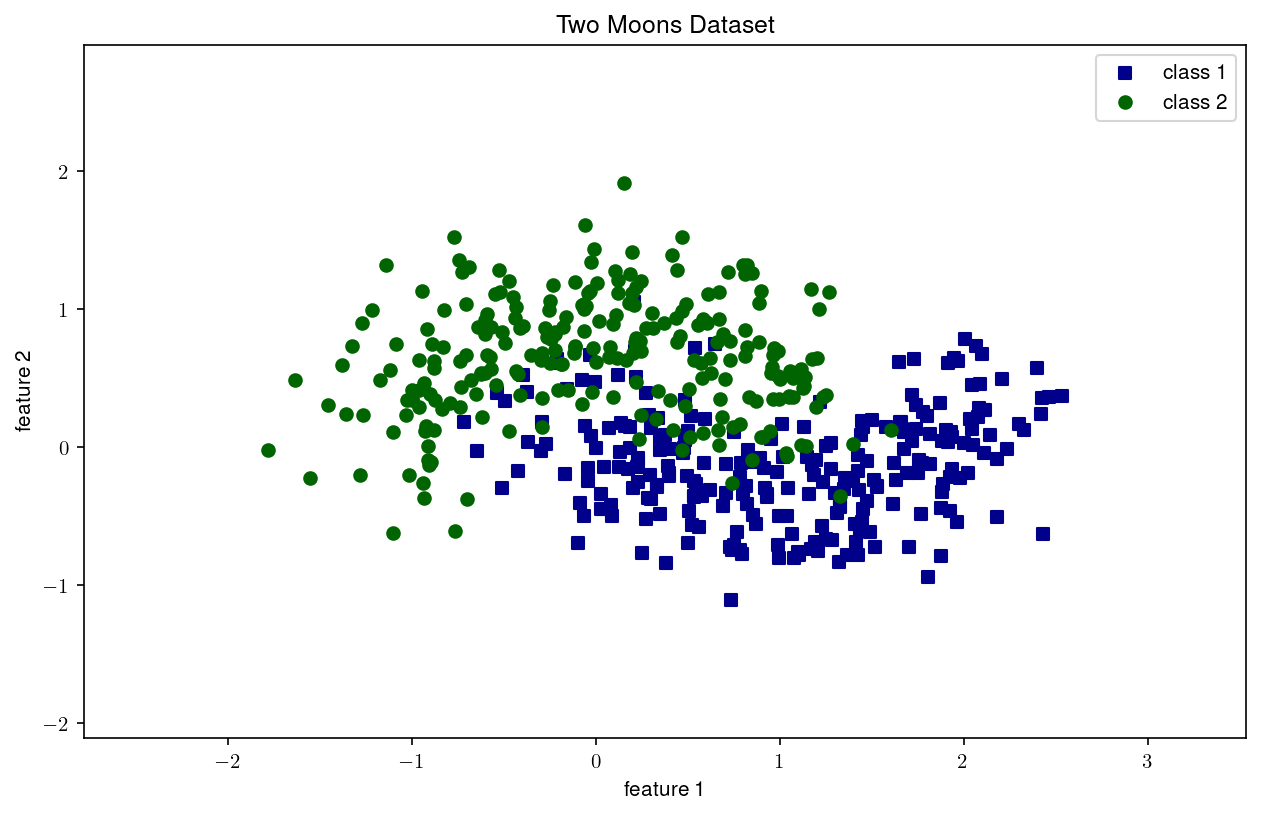

In [35]:
# there are two features contained in X and the labels are contained in y
X,y = make_moons(n_samples=500,random_state=1,noise=0.3)

# X is a 500x2 numpy.ndarray containing the coordinates for each sample
# y is a 500x1 numpy.ndarray containing the class for each sample
print(type(X), type(y)) 
print(np.shape(X), np.shape(y))

print(np.concatenate((X,y[:, np.newaxis]),axis=1)[:10,:])

# Plot the data, color by class
plt.scatter(X[y == 1, 0], X[y == 1, 1], color="DarkBlue", marker="s",label="class 1")
plt.scatter(X[y == 0, 0], X[y == 0, 1], color="DarkGreen", marker="o",label="class 2")
plt.legend(scatterpoints=1)

x_min, x_max = X[:,0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

plt.title('Two Moons Dataset')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.show()

Recall that the goal in **classification** is to develop a rule for classifying the points.

Let's see how to use  [scikit-learn](http://scikit-learn.org/) for logistic regression. 

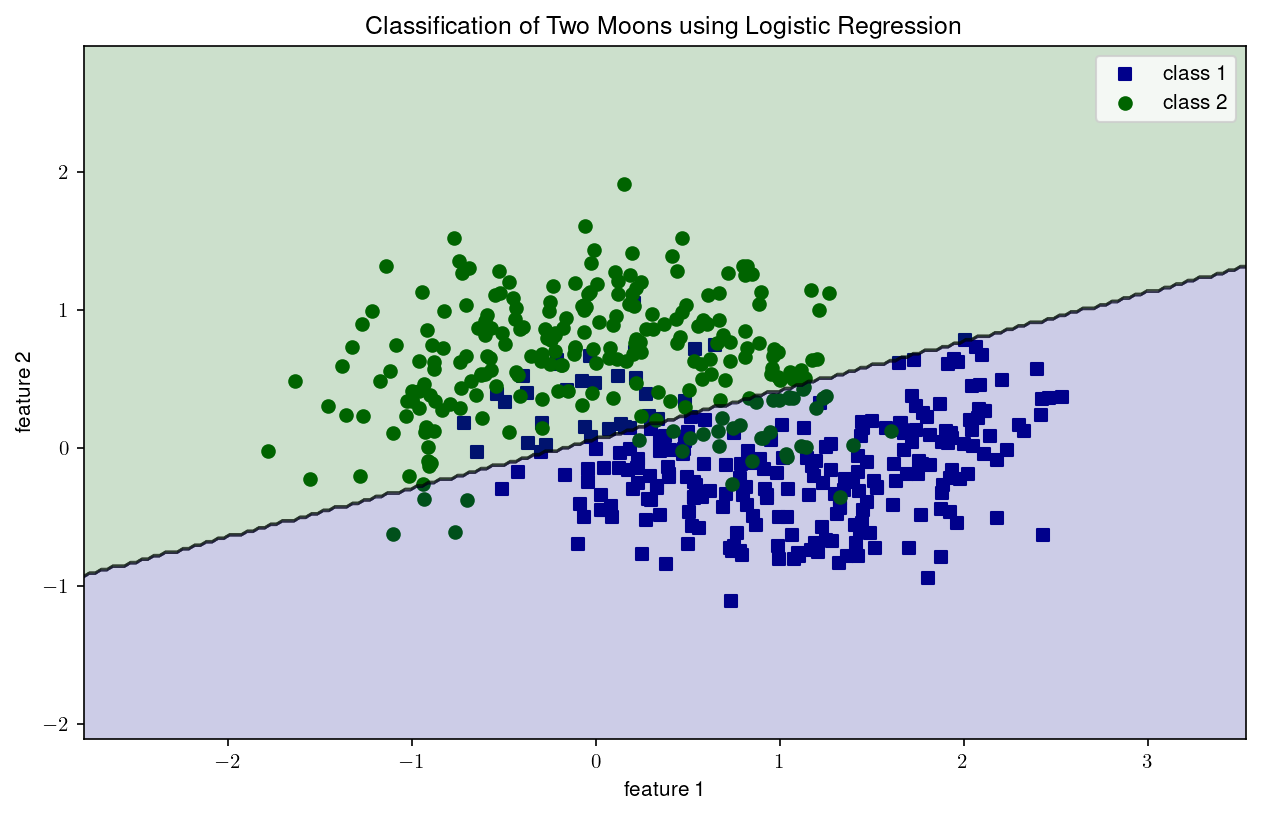

In [36]:
# set up the model 
# we could specify additional parameters here, but we'll just use the default ones
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
# Documentation has more info (e.g. how to do the multinomial regression)
model = LogisticRegression(C=1e5) 

# use the model to fit the data
model.fit(X, y)

# Plot the data, color by class
plt.scatter(X[y == 1, 0], X[y == 1, 1], color="DarkBlue", marker="s",label="class 1")
plt.scatter(X[y == 0, 0], X[y == 0, 1], color="DarkGreen", marker="o",label="class 2")
plt.legend(scatterpoints=1)

# Plot the predictions made by Logistic Regression
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),np.linspace(y_min, y_max, 200))
zz = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.contourf(xx, yy, zz, cmap=ListedColormap(['DarkGreen', 'DarkBlue']), alpha=.2)
plt.contour(xx, yy, zz, colors="black", alpha=1, linewidths=0.2) 

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.title('Classification of Two Moons using Logistic Regression')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.show()

In [37]:
y_pred = model.predict(X)
print('Accuracy:', metrics.accuracy_score(y_true=y, y_pred=y_pred))

#print('Confusion Matrix:')
#print(metrics.confusion_matrix(y_true = y, y_pred = y_pred))
#print('Precision = ', metrics.precision_score(y_true = y, y_pred = y_pred))
#print('Recall = ', metrics.recall_score(y_true = y, y_pred = y_pred))
#print('F-score = ', metrics.f1_score(y_true = y, y_pred = y_pred))
#print('Jaccard similarity score', metrics.jaccard_score(y_true = y, y_pred = y_pred))

Accuracy: 0.86


## 6.2 Let's compare with another classification algorithm: k-Nearest Neighbors (k-NN) 

**Idea:** To decide the class of a given point, find the $k$-nearest neighbors of that point, and let them "vote" on the class. That is, we assign the class to the sample that is most common among its $k$-nearest neighbors. 

**Considerations:**
1. We must pick $k$, the number of voting neighbors (typically a small number, say $k$=10)
+ 'Nearest' means closest in distance, so there is some flexibility in defining the distance. Can you name me some of your favorite distance measures?
+ There are different ways to vote. For example, of the k nearest neighbors, I might give the closest ones more weight than farther ones. 
+ We have to decide how to break ties in the vote. 

### Example: k-NN on the moons dataset

In [38]:
# there is a warning when running the k-NN classifier due to a future change in scipy.
# here we ignore it, a good idea would be to fix it
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

In [39]:
# moons
X,y = make_moons(n_samples=500,random_state=1,noise=0.3)

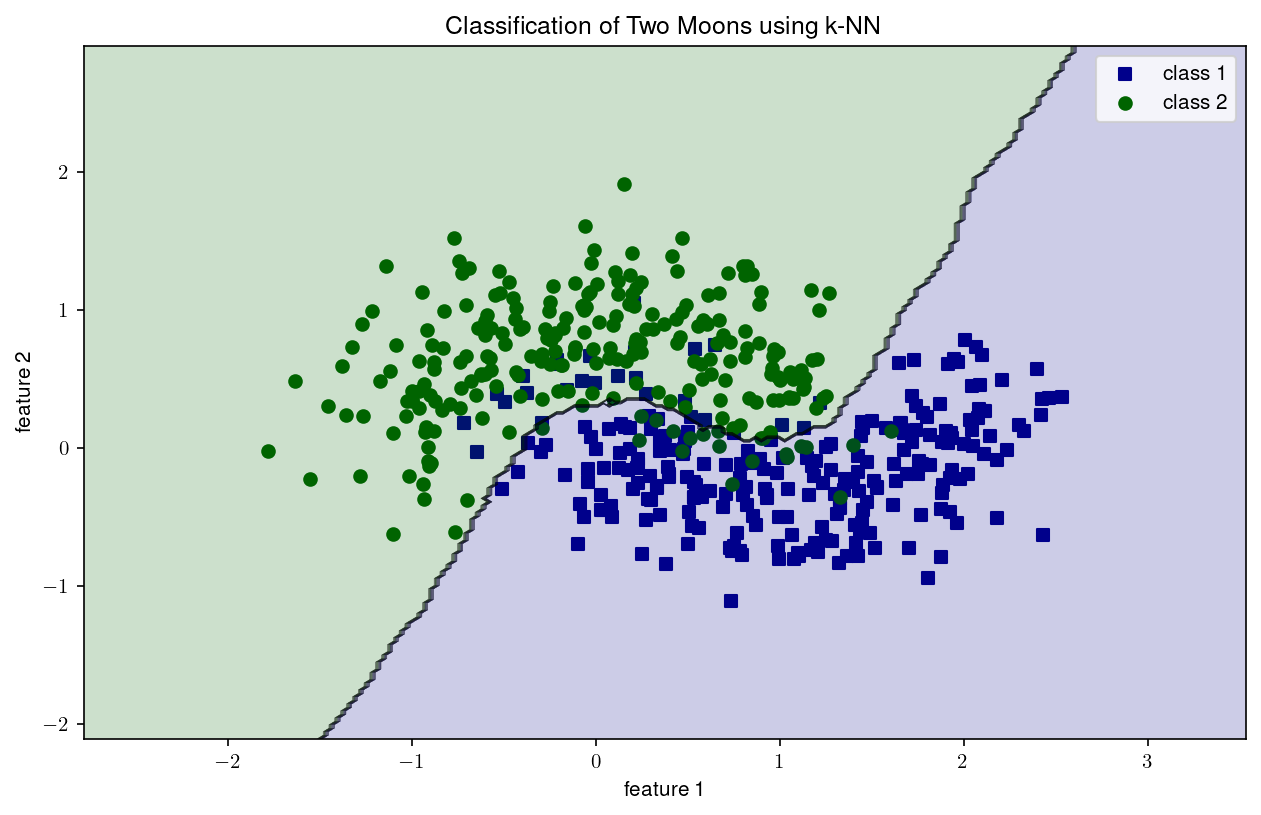

In [44]:
model = KNeighborsClassifier(n_neighbors = 50)
model.fit(X, y)

# Plot the data, color by class
plt.scatter(X[y == 1, 0], X[y == 1, 1], color="darkblue", marker="s",label="class 1")
plt.scatter(X[y == 0, 0], X[y == 0, 1], color="darkgreen", marker="o",label="class 2")
plt.legend(scatterpoints=1)

# Plot the predictions made by Logistic Regression
x_min, x_max = X[:,0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),np.linspace(y_min, y_max, 200))
zz = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.contourf(xx, yy, zz, cmap=ListedColormap(['DarkGreen', 'DarkBlue']), alpha=.2)
plt.contour(xx, yy, zz, colors="black", alpha=1, linewidths=0.2) 

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.title('Classification of Two Moons using k-NN')

plt.show()

## POLL:

<img src="wooclap.png" alt="drawing" width="500"/>

### In the case of $k$-NN, as $k$ increases what happens to the variance of the model?

### A. increases <br>
### B. decreases <br> 
### C. stays the same  <br>
### D. first increases and then decreases  <br>
### E. first decreases and then increases  <br>
### F. unicorns love bananas <br>

**Some comments on the parameter, $k$:** 

- For k large (say $k=100$), the *decision boundary* (boundary between classes) is smooth (but curved). The model is not very complex - it could basically be described by a few lines (polynomial perhaps?). The model has low variance in the sense that if the data were to change slightly, the model wouldn't change much (why? because there are many voters). Since the model doesn't depend on the data very much, we might expect that it would *generalize* to new data points. 

- For k small (say $k=1$), the decision boundary is very wiggly. The model is very complex - it definitely can't be described by a few lines. The model has high variance in the sense that if the data were to change slightly, the model would change quite a bit. Since the model is very dependent on the dataset, we would say that it wouldn't generalize to new data points well. In this case, we would say that the model has overfit the data (e.g. in the case of the high degree polynomial).

**Questions:**
1. Which does a better job on the two moons dataset: k-NN or logistic regression?
2. How to choose k?

In [41]:
y_pred = model.predict(X)
print('Accuracy:', metrics.accuracy_score(y_true=y, y_pred=y_pred))

#print('Confusion Matrix:')
#print(metrics.confusion_matrix(y_true = y, y_pred = y_pred))
#print('Precision = ', metrics.precision_score(y_true = y, y_pred = y_pred))
#print('Recall = ', metrics.recall_score(y_true = y, y_pred = y_pred))
#print('F-score = ', metrics.f1_score(y_true = y, y_pred = y_pred))
#print('Jaccard similarity score', metrics.jaccard_score(y_true = y, y_pred = y_pred))

Accuracy: 0.932


For *good* choices of the parameter k, k-NN has better performance than logistic regression. Logistic regression suffers because the decision boundary isn't curved. For this reason, it is called a *linear classifier*.  (However there are extensions to logistic regression that allow the decision boundary to curve). 


## 6.2. Reminder: Model generalizability and cross-validation

In classification, and other prediction problems (like regression), we would like to develop a model on a dataset, the *training dataset*, that will not only perform well on that dataset but on similar data that the model hasn't yet seen, the *testing dataset*. If a model satisfies this criterion, we say that it is *generalizable*. 

If a model has 100% accuracy on the training dataset ($k=1$ in k-NN) but doesn't generalize to new data, then it isn't a very good model. We say that this model has *overfit* the data. On the other hand, it isn't difficult to see that we could also *underfit* the data (taking $k$ large in k-NN). In this case, the model isn't complex enough to have good accuracy on the training dataset. 

We can use cross-validation (as in regression) to determine how generalizable our model is. A general reminder about the general cross-validation process (here we do not use a validation set and we do not use $K$-fold cross-validation):

1. Split the dataset into two groups: the training dataset and the test dataset. 
+ Train the model on the training dataset 
+ Check the accuracy of the model on the test dataset. 

Let's see this concept for the two moons dataset. We use the *train_test_split* function in scikit-learn to split the dataset into a training dataset and a test dataset. 

In [42]:
#from a medium blog that I can't find anymore 

def detect_plot_dimension(X, h=0.02, b=0.05):
    x_min, x_max = X[:, 0].min() - b, X[:, 0].max() + b
    y_min, y_max = X[:, 1].min() - b, X[:, 1].max() + b
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    dimension = xx, yy
    return dimension
 
def detect_decision_boundary(dimension, model):
    xx, yy = dimension  # unpack the dimensions
    boundary = model.predict(np.c_[xx.ravel(), yy.ravel()])
    boundary = boundary.reshape(xx.shape)  # Put the result into a color plot
    return boundary
 
def plot_decision_boundary(panel, dimension, boundary, colors=['#DADDED', '#FBD8D8']):
    xx, yy = dimension  # unpack the dimensions
    panel.contourf(xx, yy, boundary, cmap=ListedColormap(colors), alpha=1)
    panel.contour(xx, yy, boundary, colors="g", alpha=1, linewidths=0.5)  # the decision boundary in green
 
def plot_dataset(panel, X, y, colors=["#EE3D34", "#4458A7"], markers=["x", "o"]):
    panel.scatter(X[y == 1, 0], X[y == 1, 1], color=colors[0], marker=markers[0])
    panel.scatter(X[y == 0, 0], X[y == 0, 1], color=colors[1], marker=markers[1])
 
def calculate_prediction_error(model, X, y):
    yPred = model.predict(X)
    score = round(metrics.accuracy_score(y, yPred), 2)
    return score
 
def plot_prediction_error(panel, dimension, score, b=.3):
    xx, yy = dimension  # unpack the dimensions
    panel.text(xx.max() - b, yy.min() + b, ('%.2f' % score).lstrip('0'), size=15, horizontalalignment='right')
 
def explore_fitting_boundaries(model, n_neighbors, datasets, width):  
    # determine the height of the plot given the aspect ration of each panel should be equal
    height = float(width)/len(n_neighbors) * len(datasets.keys())
 
    nrows = len(datasets.keys())
    ncols = len(n_neighbors)
 
    # set up the plot
    figure, axes = plt.subplots(
        nrows,
        ncols,
        figsize=(width, height),
        sharex=True,
        sharey=True
    )
 
    dimension = detect_plot_dimension(X, h=0.02)  # the dimension each subplot based on the data
 
    # Plotting the dataset and decision boundaries
    i = 0
    for n in n_neighbors:
        model.n_neighbors = n
        model.fit(datasets["Training Set"][0], datasets["Training Set"][1])
        boundary = detect_decision_boundary(dimension, model)
        j = 0
        for d in datasets.keys():
            try:
                panel = axes[j, i]
            except (TypeError, IndexError):
                if (nrows * ncols) == 1:
                    panel = axes
                elif nrows == 1:  # if you only have one dataset
                    panel = axes[i]
                elif ncols == 1:  # if you only try one number of neighbors
                    panel = axes[j]
            plot_decision_boundary(panel, dimension, boundary)  # plot the decision boundary
            plot_dataset(panel, X=datasets[d][0], y=datasets[d][1])  # plot the observations
            score = calculate_prediction_error(model, X=datasets[d][0], y=datasets[d][1])
            plot_prediction_error(panel, dimension, score, b=0.2)  # plot the score
 
            # make compacted layout
            panel.set_frame_on(False)
            panel.set_xticks([])
            panel.set_yticks([])
 
            # format the axis labels
            if i == 0:
                panel.set_ylabel(d)
            if j == 0:
                panel.set_title('k={}'.format(n))
            j += 1
        i += 1   
 
    plt.subplots_adjust(hspace=0, wspace=0)  # make compacted layout

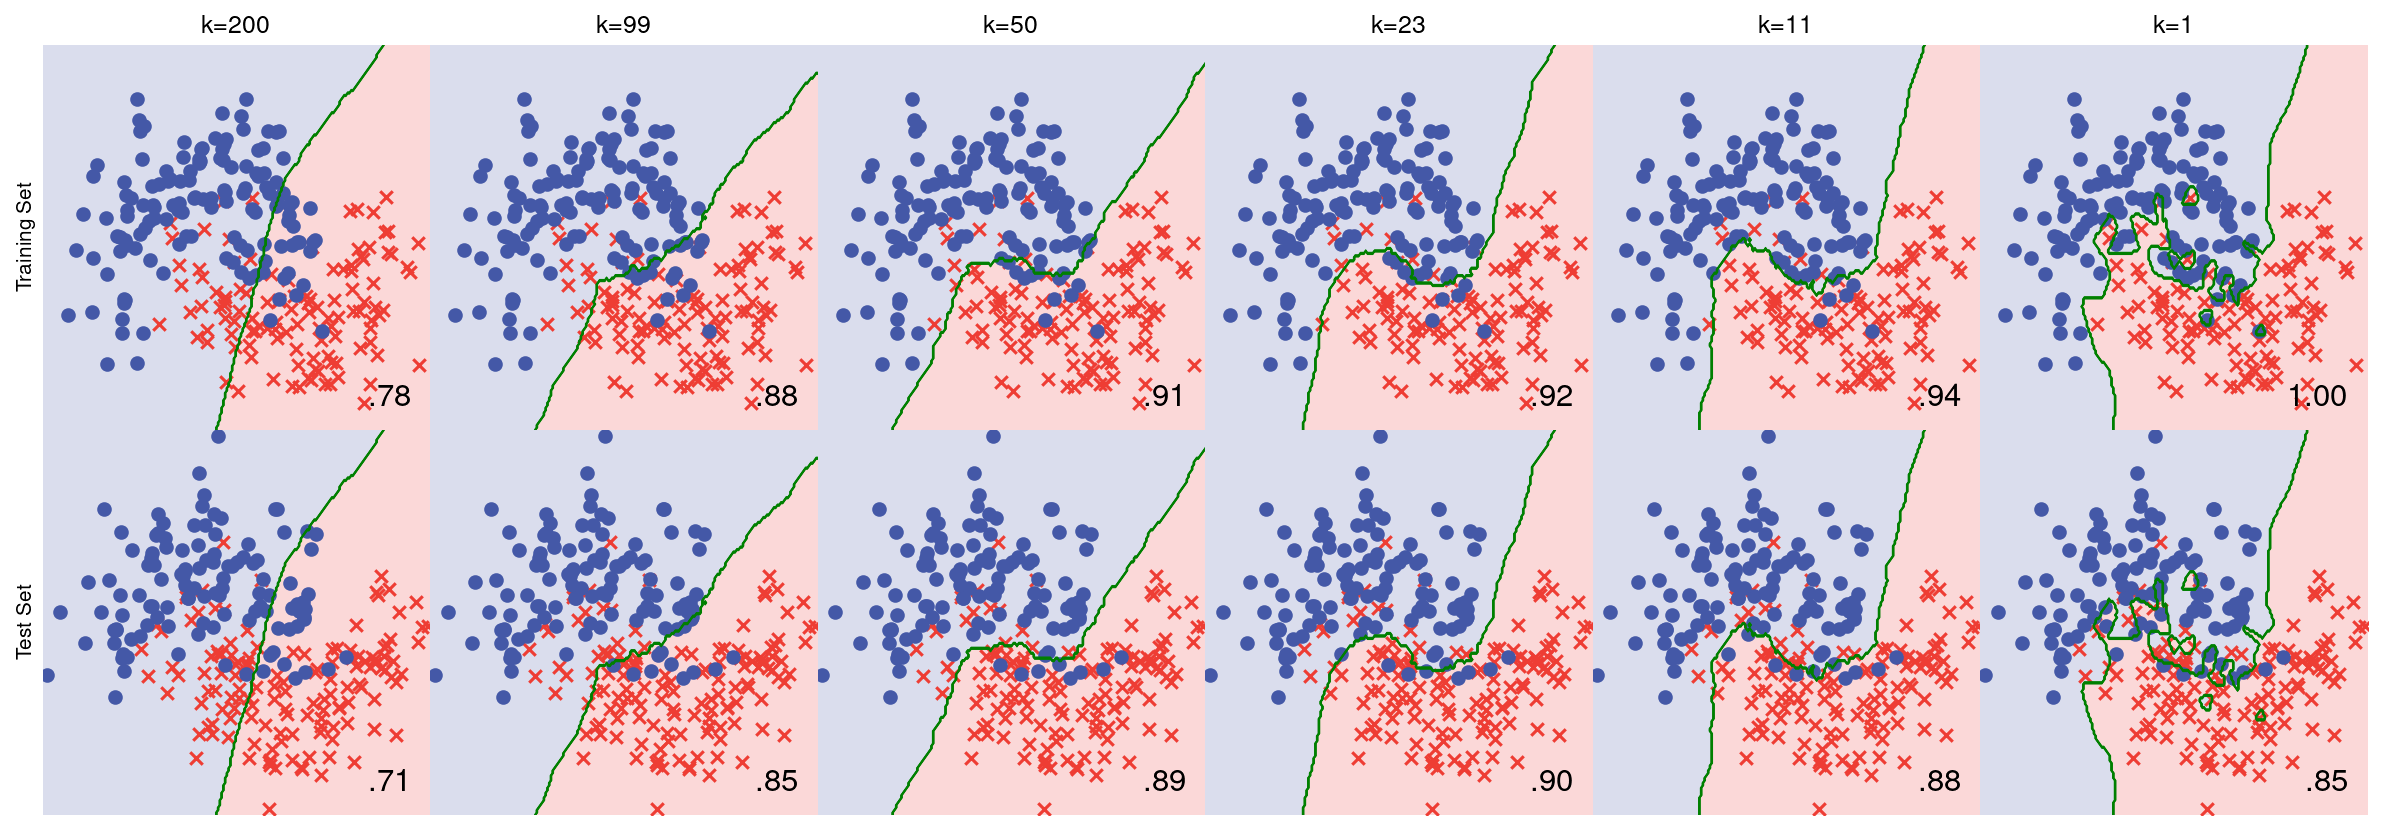

In [43]:
# Split into training and test sets
XTrain, XTest, yTrain, yTest = train_test_split(X, y, random_state=1, test_size=0.5)

# specify the model and settings
model = KNeighborsClassifier()
n_neighbors = [200, 99, 50, 23, 11, 1]
datasets = {
    "Training Set": [XTrain, yTrain],
    "Test Set": [XTest, yTest]
}
width = 20

explore_fitting_boundaries(model=model, n_neighbors=n_neighbors, datasets=datasets, width=width)
